<a href="https://colab.research.google.com/github/zenosance/Kelompok-3_PCVK_TI3H_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Praktikum Minggu 7**

## **Kelompok 3 - TI 3H**
1. Mohammad Izamul Fikri Fahmi - 2141720171
2. Lukas Valentino - 2141720032
3. Septi Lutfiani - 2141720038

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Library yang Mungkin Diperlukan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:

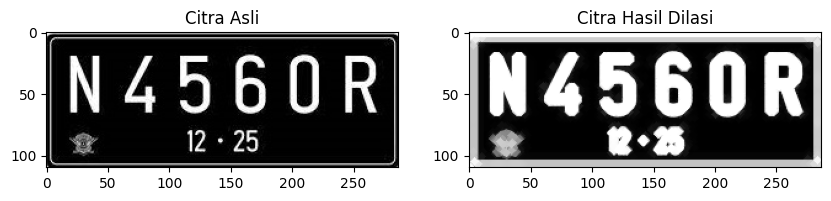

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def dilasi(citra, sed):
    # Inisialisasi citra hasil dilasi
    hasil = np.zeros_like(citra)

    # Lakukan iterasi pada setiap piksel pada citra input
    for i in range(citra.shape[0]):
        for j in range(citra.shape[1]):
            # Inisialisasi nilai maksimum
            maks = 0

            # Lakukan iterasi pada setiap elemen pada SED
            for k in range(sed.shape[0]):
                for l in range(sed.shape[1]):
                    # Jika elemen SED adalah 1, maka tambahkan nilai piksel ke dalam citra hasil dilasi
                    if sed[k][l] == 1:
                        # Periksa apakah indeks piksel yang akan diakses berada di dalam batas citra
                        if i + k - 1 >= 0 and i + k - 1 < citra.shape[0] and j + l - 1 >= 0 and j + l - 1 < citra.shape[1]:
                            # Perbarui nilai maksimum
                            maks = max(maks, citra[i + k - 1][j + l - 1])

            # Setelah selesai melakukan iterasi pada semua elemen SED, masukkan nilai maksimum ke dalam citra hasil dilasi
            hasil[i][j] = maks

    return hasil

# Uji coba fungsi dilasi
citra = cv2.imread('/content/drive/MyDrive/pcvk-sem5/week9/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

sed = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

def dilate(image, sed, iterations=1):
    # Lakukan operasi dilasi sebanyak 'iterations' kali
    for _ in range(iterations):
        image = dilasi(image, sed)
    return image

# Melakukan operasi dilasi pada citra dengan beberapa iterasi
dilated_image = dilate(citra, sed, iterations=3)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()


Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:

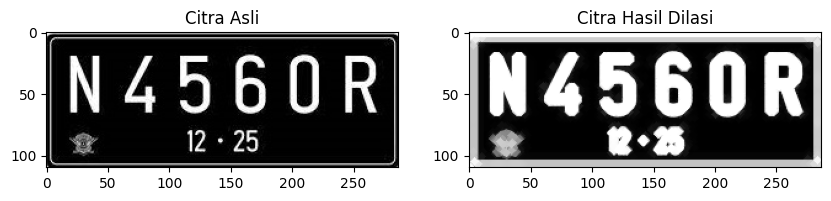

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra dari Google Drive
citra = cv2.imread('/content/drive/MyDrive/pcvk-sem5/week9/img/plat.jpg', cv2.IMREAD_GRAYSCALE)

# Mendefinisikan Structuring Element Dilasi (SED) berbentuk cross 3 x 3
sed = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Melakukan operasi dilasi pada citra dengan beberapa iterasi menggunakan fungsi dilate dari OpenCV
dilated_image = cv2.dilate(citra, sed, iterations=3)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()

Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:

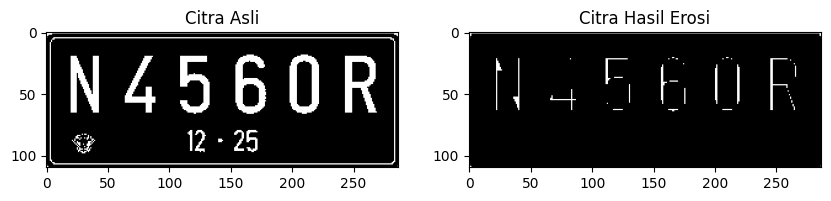

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def erode(image):
    # Mendefinisikan Structuring Element Erosi (SE) berbentuk square 5 x 5
    se = np.ones((5, 5), dtype=np.uint8)

    # Mendapatkan dimensi citra
    h, w = image.shape

    # Membuat citra output dengan nilai awal sama dengan citra input
    output = image.copy()

    # Melakukan operasi erosi
    for i in range(2, h-2):
        for j in range(2, w-2):
            if np.array_equal(image[i-2:i+3, j-2:j+3] & se, se):
                # Jika semua piksel di bawah SE bernilai 1, set piksel di citra output menjadi 1
                output[i, j] = 255
            else:
                # Jika tidak, set piksel di citra output menjadi 0
                output[i, j] = 0

    return output

# Membaca citra dari Google Drive
img = cv.imread('/content/drive/MyDrive/pcvk-sem5/week9/img/plat.jpg', cv.IMREAD_GRAYSCALE)

# Mengubah citra menjadi biner
_, img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Melakukan operasi erosi pada citra
eroded_image = erode(img)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.show()

Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini:


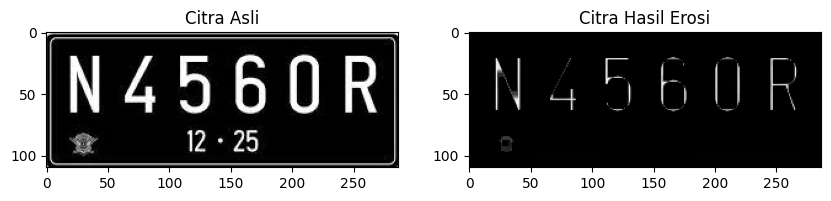

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra dari Google Drive
img = cv.imread('/content/drive/MyDrive/pcvk-sem5/week9/img/plat.jpg', cv.IMREAD_GRAYSCALE)

# Mendefinisikan Structuring Element Erosi (SE) berbentuk square 5 x 5
se = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

# Melakukan operasi erosi pada citra menggunakan fungsi erode dari OpenCV
eroded_image = cv.erode(img, se)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.show()


Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:
Operasi Opening Menggunakan tanpa Library Morphology

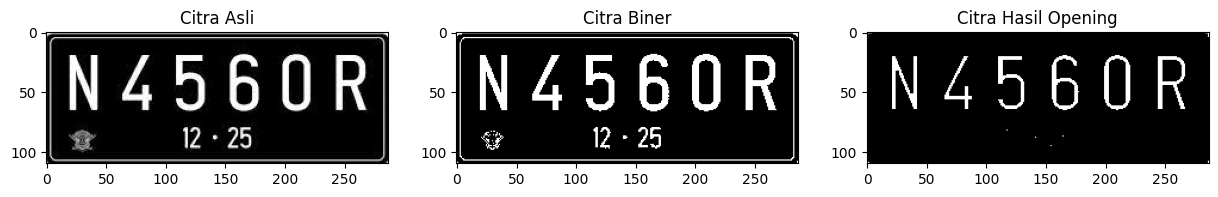

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def erode(image, se):
    # Mendapatkan dimensi citra
    h, w = image.shape

    # Membuat citra output dengan nilai awal sama dengan citra input
    output = image.copy()

    # Melakukan operasi erosi
    for i in range(1, h-1):
        for j in range(1, w-1):
            if np.array_equal(image[i-1:i+2, j-1:j+2] & se, se):
                # Jika semua piksel di bawah SE bernilai 1, set piksel di citra output menjadi 1
                output[i, j] = 255
            else:
                # Jika tidak, set piksel di citra output menjadi 0
                output[i, j] = 0

    return output

def dilate(image, se):
    # Mendapatkan dimensi citra
    h, w = image.shape

    # Membuat citra output dengan nilai awal sama dengan citra input
    output = image.copy()

    # Melakukan operasi dilasi
    for i in range(1, h-1):
        for j in range(1, w-1):
            if image[i, j] == 255:
                # Jika piksel di citra input bernilai 255, aplikasikan SE ke citra output
                output[i-1:i+2, j-1:j+2] |= se

    return output

def opening(image, se):
    return dilate(erode(image, se), se)

# Membaca citra dari Google Drive
img = cv.imread('/content/drive/MyDrive/pcvk-sem5/week9/img/plat.jpg', cv.IMREAD_GRAYSCALE)

# Mengubah citra menjadi biner
_, img_binary = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Mendefinisikan Structuring Element (SE) berbentuk square 3 x 3
se = np.ones((3, 3), dtype=np.uint8)

# Melakukan operasi opening pada citra
opened_image = opening(img_binary, se)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 3, 2)
plt.imshow(img_binary, cmap='gray')
plt.title('Citra Biner')

plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Citra Hasil Opening')

plt.show()

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:
operasi closing tanpa library morphology

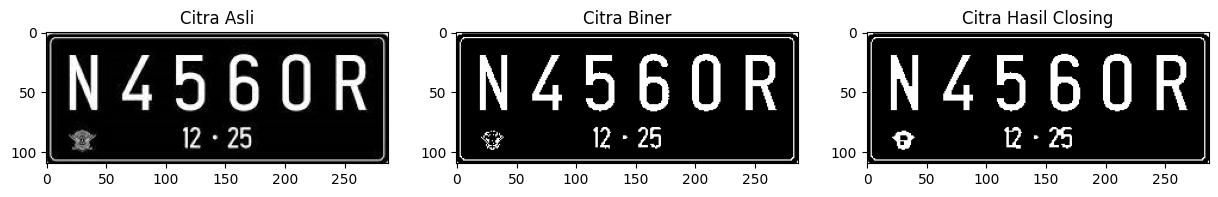

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def erode(image, se):
    # Mendapatkan dimensi citra
    h, w = image.shape

    # Membuat citra output dengan nilai awal sama dengan citra input
    output = image.copy()

    # Melakukan operasi erosi
    for i in range(1, h-1):
        for j in range(1, w-1):
            if np.array_equal(image[i-1:i+2, j-1:j+2] & se, se):
                # Jika semua piksel di bawah SE bernilai 1, set piksel di citra output menjadi 1
                output[i, j] = 255
            else:
                # Jika tidak, set piksel di citra output menjadi 0
                output[i, j] = 0

    return output

def dilate(image, se):
    # Mendapatkan dimensi citra
    h, w = image.shape

    # Membuat citra output dengan nilai awal sama dengan citra input
    output = image.copy()

    # Melakukan operasi dilasi
    for i in range(1, h-1):
        for j in range(1, w-1):
            if image[i, j] == 255:
                # Jika piksel di citra input bernilai 255, aplikasikan SE ke citra output
                output[i-1:i+2, j-1:j+2] |= se

    return output

def closing(image, se):
    return erode(dilate(image, se), se)

# Membaca citra dari Google Drive
img = cv.imread('/content/drive/MyDrive/pcvk-sem5/week9/img/plat.jpg', cv.IMREAD_GRAYSCALE)

# Mengubah citra menjadi biner
_, img_binary = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Mendefinisikan Structuring Element (SE) berbentuk square 3 x 3
se = np.ones((3, 3), dtype=np.uint8)

# Melakukan operasi closing pada citra
closed_image = closing(img_binary, se)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 3, 2)
plt.imshow(img_binary, cmap='gray')
plt.title('Citra Biner')

plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Citra Hasil Closing')

plt.show()


Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

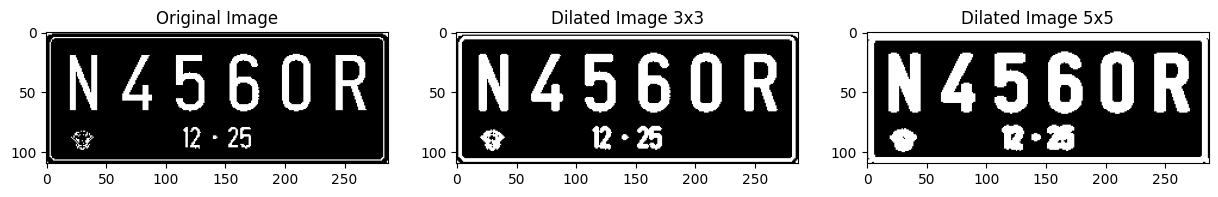

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img = cv.imread('/content/drive/MyDrive/pcvk-sem5/week9/img/plat.jpg', cv.IMREAD_GRAYSCALE)

# Mengubah citra menjadi biner
_, img_binary = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Mendefinisikan Structuring Element berbentuk Circular 3 x 3
se_circular_3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))

# Mendefinisikan Structuring Element berbentuk Circular 5 x 5
se_circular_5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

# Melakukan operasi dilasi
img_dilated_3x3 = cv.dilate(img_binary, se_circular_3x3)
img_dilated_5x5 = cv.dilate(img_binary, se_circular_5x5)

# Menampilkan gambar awal dan hasil dilasi menggunakan matplotlib
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(img_dilated_3x3, cmap='gray')
plt.title('Dilated Image 3x3')

plt.subplot(1, 3, 3)
plt.imshow(img_dilated_5x5, cmap='gray')
plt.title('Dilated Image 5x5')

plt.show()


Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:


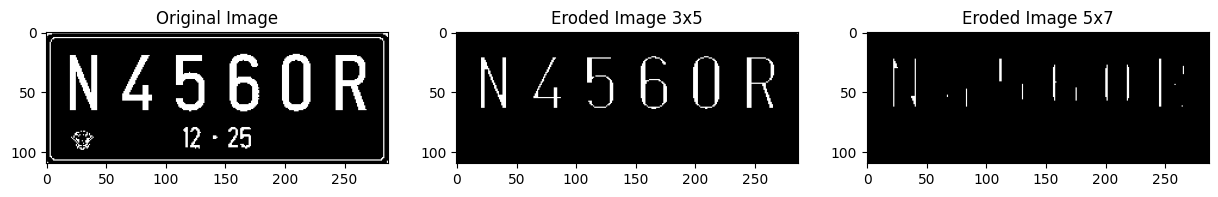

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img = cv.imread('/content/drive/MyDrive/pcvk-sem5/week9/img/plat.jpg', cv.IMREAD_GRAYSCALE)

# Mengubah citra menjadi biner
_, img_binary = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Mendefinisikan Structuring Element berbentuk Rectangle 3 x 5
se_rectangular_3x5 = cv.getStructuringElement(cv.MORPH_RECT, (3, 5))

# Mendefinisikan Structuring Element berbentuk Rectangle 5 x 7
se_rectangular_5x7 = cv.getStructuringElement(cv.MORPH_RECT, (5, 7))

# Melakukan operasi erosi
img_eroded_3x5 = cv.erode(img_binary, se_rectangular_3x5)
img_eroded_5x7 = cv.erode(img_binary, se_rectangular_5x7)

# Menampilkan gambar awal dan hasil erosi menggunakan matplotlib
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(img_eroded_3x5, cmap='gray')
plt.title('Eroded Image 3x5')

plt.subplot(1, 3, 3)
plt.imshow(img_eroded_5x7, cmap='gray')
plt.title('Eroded Image 5x7')

plt.show()


Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

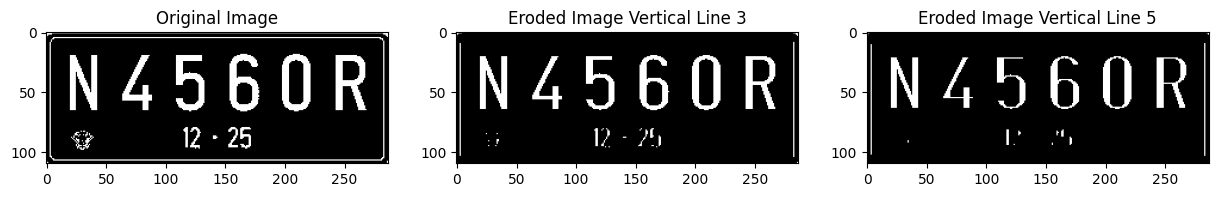

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img = cv.imread('/content/drive/MyDrive/pcvk-sem5/week9/img/plat.jpg', cv.IMREAD_GRAYSCALE)

# Mengubah citra menjadi biner
_, img_binary = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Mendefinisikan Structuring Element berbentuk Line Vertikal 3
se_line_vertical_3 = np.ones((3,1),np.uint8)

# Mendefinisikan Structuring Element berbentuk Line Vertikal 5
se_line_vertical_5 = np.ones((5,1),np.uint8)

# Melakukan operasi erosi
img_eroded_3 = cv.erode(img_binary, se_line_vertical_3)
img_eroded_5 = cv.erode(img_binary, se_line_vertical_5)

# Menampilkan gambar awal dan hasil erosi menggunakan matplotlib
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(img_eroded_3, cmap='gray')
plt.title('Eroded Image Vertical Line 3')

plt.subplot(1, 3, 3)
plt.imshow(img_eroded_5, cmap='gray')
plt.title('Eroded Image Vertical Line 5')

plt.show()


TopHat

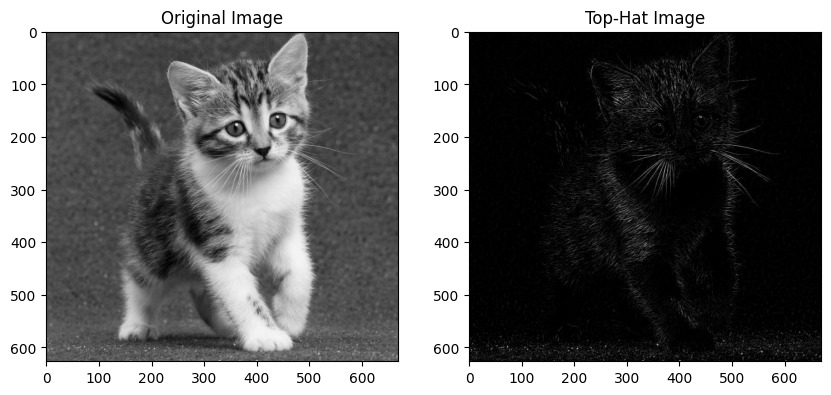

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img = cv.imread('/content/drive/MyDrive/pcvk-sem5/week9/img/kitten01.jpg', cv.IMREAD_GRAYSCALE)

# Mendefinisikan Structuring Element berbentuk Circular 5 x 5
se_circular_5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))

# Melakukan operasi Top-Hat
img_tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, se_circular_5x5)

# Menampilkan gambar awal dan hasil Top-Hat menggunakan matplotlib
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(img_tophat, cmap='gray')
plt.title('Top-Hat Image')

plt.show()


BlackHat

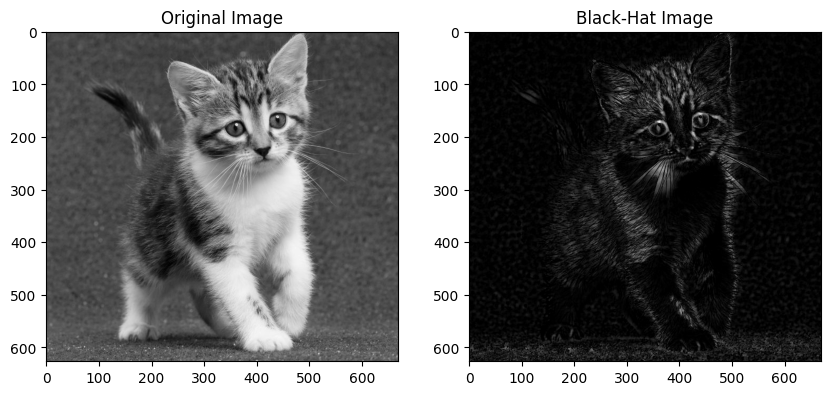

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img = cv.imread('/content/drive/MyDrive/pcvk-sem5/week9/img/kitten01.jpg', cv.IMREAD_GRAYSCALE)

# Mendefinisikan Structuring Element berbentuk Circular 10 x 10
se_circular_10x10 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (10, 10))

# Melakukan operasi Black-Hat
img_blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, se_circular_10x10)

# Menampilkan gambar awal dan hasil Black-Hat menggunakan matplotlib
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(img_blackhat, cmap='gray')
plt.title('Black-Hat Image')

plt.show()

Skeleteon

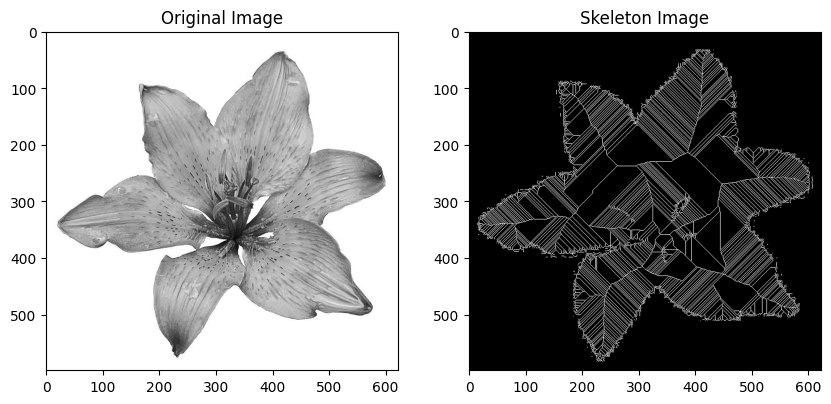

In [ ]:
from skimage.morphology import skeletonize, thin
from skimage.util import invert

img = cv.imread('/content/drive/MyDrive/pcvk-sem5/week9/img/lily.jpg', cv.IMREAD_GRAYSCALE)
image_inverted = invert(img)
image_skeleton = skeletonize(image_inverted, method='lee')

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image_skeleton, cmap='gray')
plt.title('Skeleton Image')

plt.show()

Skeleton Inverse

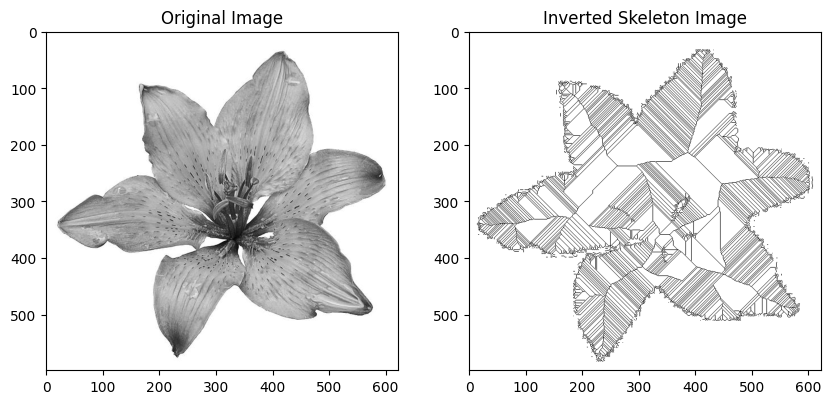

In [ ]:
from skimage.morphology import skeletonize, thin
from skimage.util import invert

img = cv.imread('/content/drive/MyDrive/pcvk-sem5/week9/img/lily.jpg', cv.IMREAD_GRAYSCALE)
image_inverted = invert(img)
image_skeleton = skeletonize(image_inverted, method='lee')

# Inversi hasil skeleton
image_skeleton_inverted = invert(image_skeleton)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image_skeleton_inverted, cmap='gray')
plt.title('Inverted Skeleton Image')

plt.show()


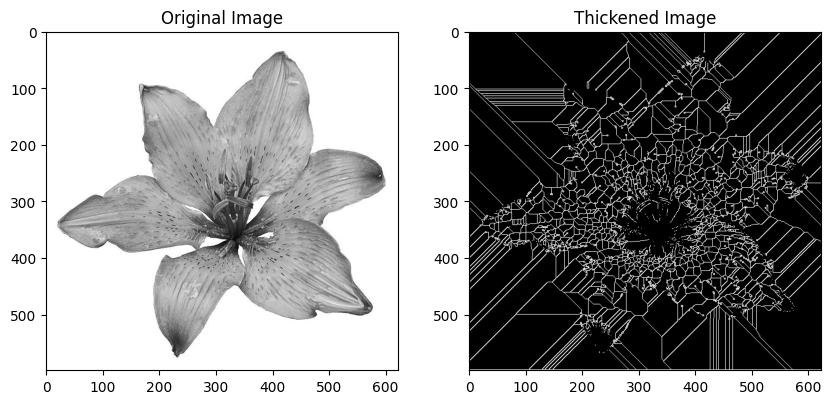

In [ ]:
from skimage.morphology import skeletonize, thin
from skimage.util import invert

img = cv.imread('/content/drive/MyDrive/pcvk-sem5/week9/img/lily.jpg', cv.IMREAD_GRAYSCALE)

# Melakukan operasi thickening
image_thickened = cv2.ximgproc.thinning(img)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image_thickened, cmap='gray')
plt.title('Thickened Image')

plt.show()


### Tugas Praktikum

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


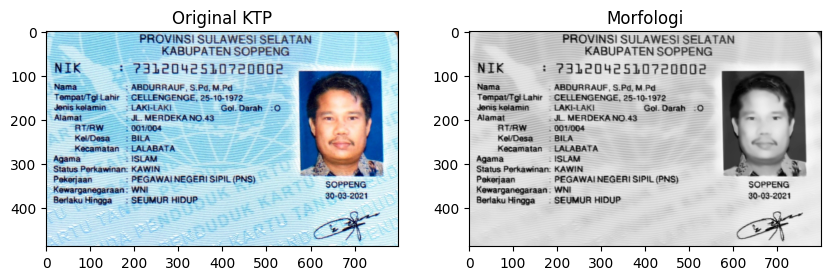

In [25]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

# Baca gambar KTP
ktp = cv.imread('/content/drive/MyDrive/pcvk-sem5/img/ktp/KTP7.jpeg')

# Terapkan denoising menggunakan fastNlMeansDenoisingColored
denoised_image = cv.fastNlMeansDenoisingColored(ktp, None, 10, 10, 7, 21)

# Konversi ke grayscale
gray = cv.cvtColor(denoised_image, cv.COLOR_BGR2GRAY)

# Thresholding
_, thresh = cv.threshold(gray, 255, 0, cv.THRESH_TRUNC)


plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
plt.title('Original KTP')

plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Morfologi')

plt.show()


Karena saya melihat tulisannya nyambung dan sepertinya sulit dibaca, maka akan saya lakukan operasi

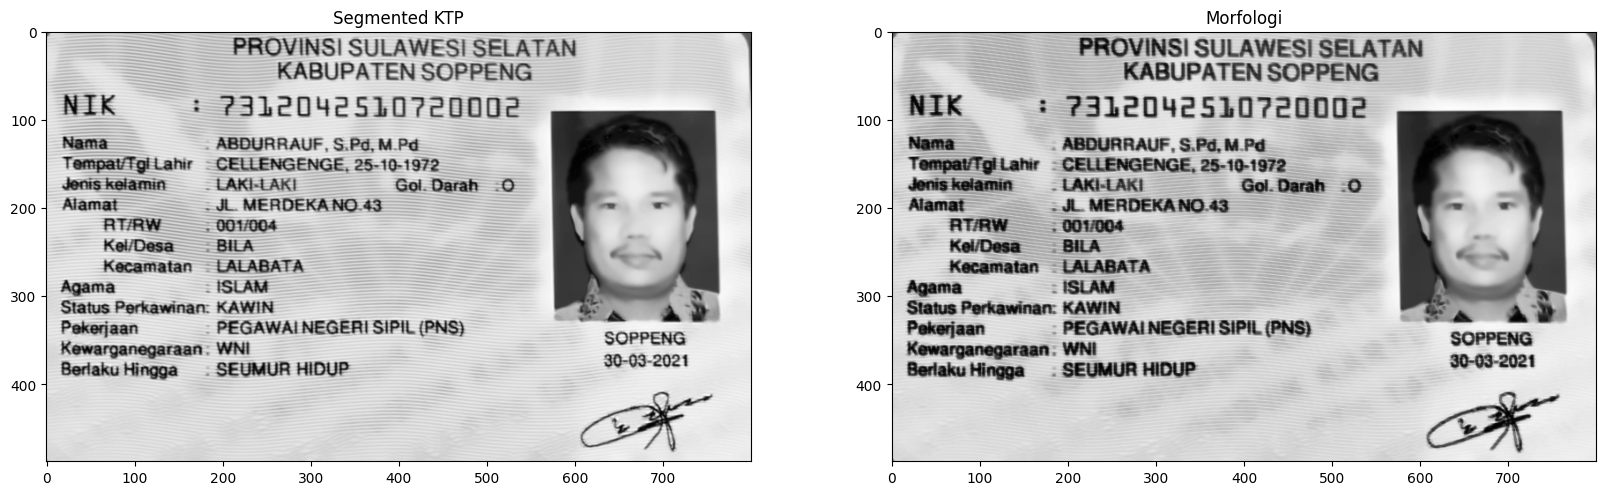

In [45]:
# # Operasi closing
# kernel = np.ones((1, 1), np.uint8)  # Anda dapat menyesuaikan ukuran kernel sesuai kebutuhan
# closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

# Buat kernel untuk erosi (misalnya kernel berukuran 1x2)
kernel = np.ones((2, 2), np.uint8)
erode = cv.erode(thresh, kernel, iterations=1)

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title('Segmented KTP')

plt.subplot(1, 2, 2)
plt.imshow(erode,cmap='gray')
plt.title('Morfologi')

plt.show()

In [3]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 0s (10.9 MB/s)
debconf: unable to init

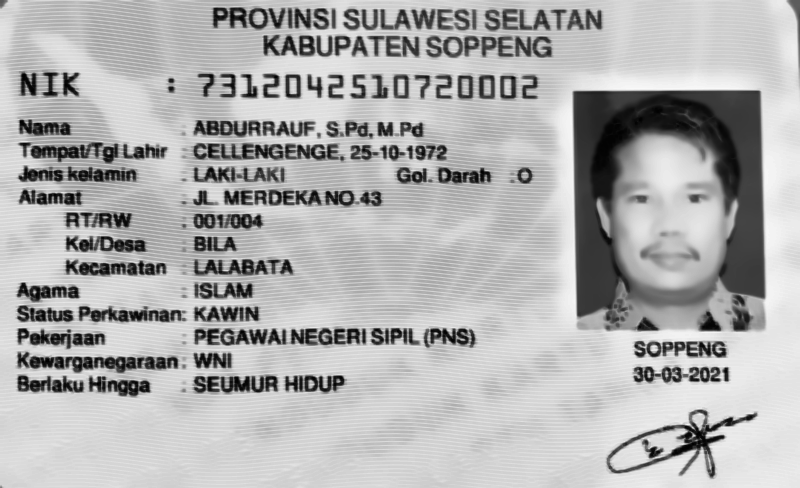

Hasil OCR:
PROVINS! SULAWESI! SELATAN

KABUPATEN SOPPENG

NIK : 7312042510720002
Nama ABDURRAUF, S.Pd, M.Pd
Tempat/fgiiahir - CELLENGENGE, 25-10-1972
Jenis keiamin - LAKL-LAKI Gol. Darah -O
Alamat - JL. MERDEKA NO.43

RTRW - 0017004

Kei/Desa BLA

Kecamatan — LALABATA

z aoa

Status Perkawinan: KA\
— PeGAWA NEGERI SIPIL (PNS)

Kewarganegaraan. WNi
Berlaku Hingga . SEUMUR HIDUP

 



In [46]:
import pytesseract

# Gunakan pytesseract untuk melakukan OCR pada gambar hasil erosi
text = pytesseract.image_to_string(erode)

cv2_imshow(erode)
# Tampilkan hasil OCR
print("Hasil OCR:")
print(text)

In [47]:
import pytesseract

# Gunakan pytesseract untuk melakukan OCR pada gambar hasil erosi
text = pytesseract.image_to_string(thresh)

# Tampilkan hasil OCR
print("Hasil OCR:")
print(text)

Hasil OCR:
: KAWIN
ae NEGERI SIPIL (PNS}

PROVINS! SULAWESI SELATAN

KABUPATEN SOPPENG
#34204e51072000e
ABDURRAUF, S.Pd, M Pd
CELLENGENGE, 25-10-1972

_ LAKI-LAKI Gol. Darah -O
= JL. MERDEKA NO 43
+ 0017004
BUA
LALABATA
- ISLAM

z SEUMUR HIDUP

   

3
‘a Ok 3
SOPPENG
30-03-2021

FE



Tampak hasil yang menggunakan erode lebih baik daripada tanpa

Saya coba melakukan dilate

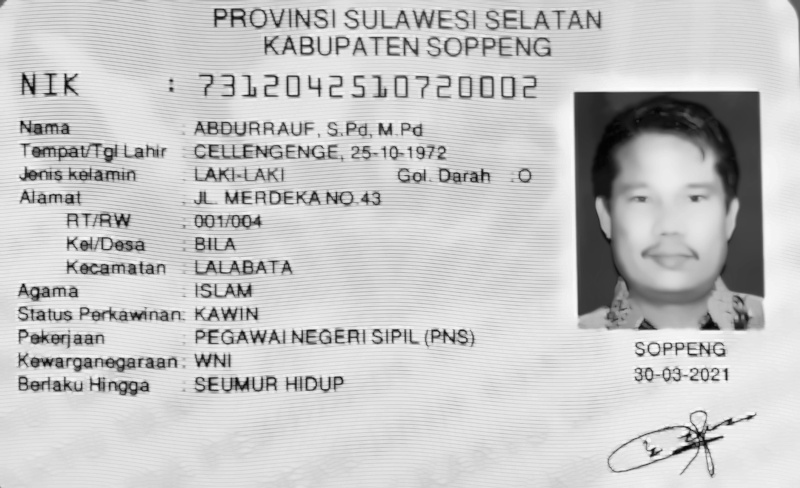

Hasil OCR:
PROVINS! SULAWESI SELATAN

KABUPATEN SOPPENG
NIK > ?31204251,07e000e
Nama ABDURRAUF, S.Pd, M Pd
TempatTgiiahir -CELLENGENGE, 25-10-1972
denis kelamin LAKI-LAKI Gol. Darah .O
Alamat JL MERDEKA NO 43
ATRW , 6017004

Kel/Desa BILA
Kecamatan - LALABATA
Agama ISLAM

   

Status Perkawinan. KAWIN eo
Pekerjaan PEGAWAI NEGERI SIPIL (PNS} SOPPENG
Kewarganegaraan. WNI 30-03-2021
Berlaku Hingga =. SEUMUR HIDUP



In [48]:
dilate = cv.dilate(thresh, kernel, iterations=1)

text = pytesseract.image_to_string(dilate)

cv2_imshow(dilate)

# Tampilkan hasil OCR
print("Hasil OCR:")
print(text)

## Kesimpulan
### Erode:
<hr>
Hasil OCR:

PROVINS! SULAWESI! SELATAN

KABUPATEN SOPPENG

NIK :

Nama ABDURRAUF, S.Pd, M.Pd

Tempat/fgiiahir - CELLENGENGE, 25-10-1972

Jenis keiamin - LAKL-LAKI Gol. Darah -

Alamat - JL. MERDEKA NO.43

RTRW - 0017004

Kei/Desa BLA

Kecamatan — LALABATA

z aoa

Status Perkawinan: KA\

— PeGAWA NEGERI SIPIL (PNS)

Kewarganegaraan. WNi

Berlaku Hingga . SEUMUR HIDUP
<hr>

### Dilate:

<hr>
Hasil OCR:

PROVINS! SULAWESI SELATAN

KABUPATEN SOPPENG

NIK > ?31204251,07e000e

Nama ABDURRAUF, S.Pd, M Pd

TempatTgiiahir -CELLENGENGE, 25-10-1972

denis kelamin LAKI-LAKI Gol. Darah .O

Alamat JL MERDEKA NO 43

ATRW , 6017004

Kel/Desa BILA

Kecamatan - LALABATA

Agama ISLAM

   
Status Perkawinan. KAWIN eo

Pekerjaan PEGAWAI NEGERI SIPIL (PNS} SOPPENG

Kewarganegaraan. WNI 30-03-2021

Berlaku Hingga =. SEUMUR HIDUP

<hr>


Karena menurut saya data yang atas itu bagusan menggunakan erode, dan bawah menggunakan dilate, maka saya akan coba split, yang atas kita proses erode, yang bawah kita dilate, lalu kita lihat hasilnya

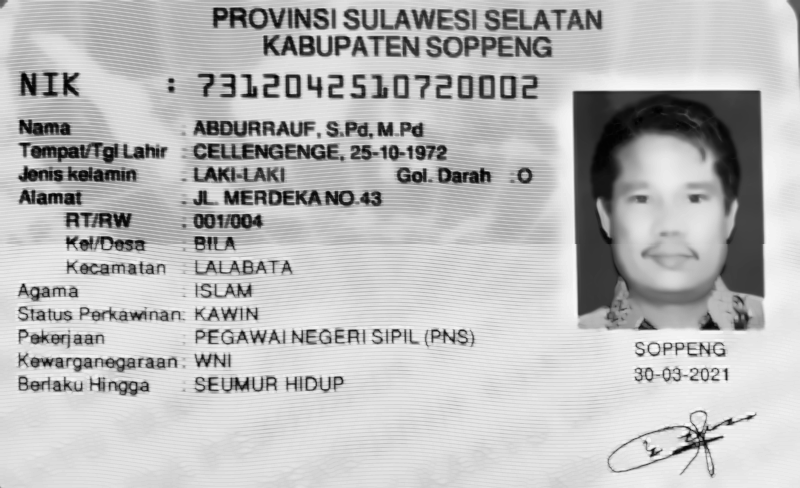

In [62]:
# Bagi gambar menjadi dua bagian secara horizontal
height, width = thresh.shape
middle = height // 2
top_half = thresh[0:middle, :]
bottom_half = thresh[middle:height, :]

# Buat kernel untuk erosi bagian tengah ke atas
kernel_top = np.ones((2, 2), np.uint8)
erode_top = cv.erode(top_half, kernel_top, iterations=1)

# Buat kernel untuk dilasi bagian tengah ke bawah
kernel_bottom = np.ones((2, 2), np.uint8)
dilate_bottom = cv.dilate(bottom_half, kernel_bottom, iterations=1)

# Gabungkan hasil erosi dan dilasi
result = np.vstack((erode_top, dilate_bottom))

# Tampilkan hasil
cv2_imshow(result)

In [61]:
text = pytesseract.image_to_string(result)
# Tampilkan hasil OCR
print("Hasil OCR:")
print(text)

Hasil OCR:
PROVINS! SULAWESI SELATAN

KABUPATEN SOPPENG
NIK > ?3)be04eSi07e000e
Nama ABDURRAUF, S.Pd,M.Pd
TempatTgiLahir — CELLENGENGE, 25-10-1972
Jeniskelamin —__ LAKI-LAKI Gol. Darah.
Aiamat - JL. MERDEKA NO 43
RATRW , 001/004

Kel/Desa_——: BILA
Kecamatan - LALABATA

   

Agama ISLAM *

Status Perkawinan: KAWIN “7% ad
Pekerjaan PEGAWAI NEGERI SIPIL (PNS) SOPPENG
Kewarganegaraan. WN 30-03-2021

Berlaku Hingga SEUMUR HIDUP

FF



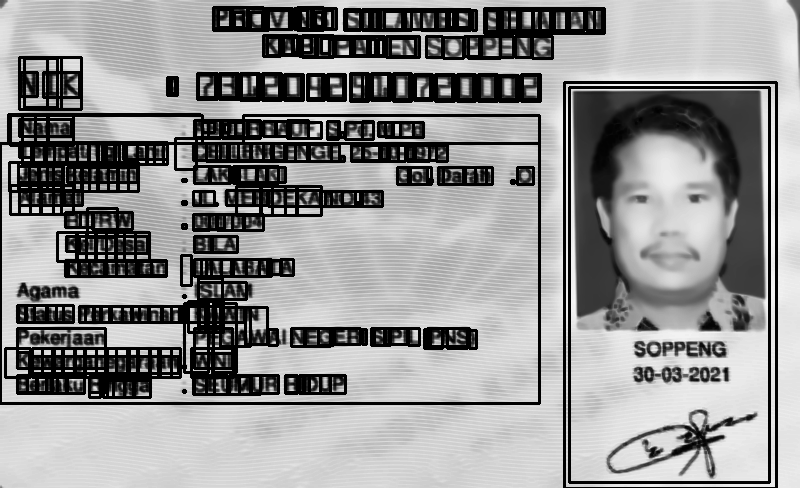

In [65]:
# Dapatkan hasil deteksi teks dalam bentuk bounding boxes

detection_boxes = pytesseract.image_to_boxes(erode)

# Gambar kotak-kotak di sekitar teks yang terdeteksi
for box in detection_boxes.splitlines():
    box = box.split()
    x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
    cv.rectangle(erode, (x, erode.shape[0] - y), (w, erode.shape[0] - h), (0, 0, 255), 2)

# Tampilkan gambar dengan kotak-kotak di sekitar teks yang terdeteksi
cv2_imshow(erode)

ternyata tetep jelek, yang terbaik masih erode untuk sementara dalam membaca data
